In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


#### 1. EXPLORATORY DATA ANALYSIS ###

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500) 

In [66]:
df = pd.read_csv("diabetes_pima_indian.csv")

In [67]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------     Data Shape     --------------------
(768, 9)

--------------------  The First 5 Data  --------------------
   Pregnancies  Glucose  BloodPressure  Sk

#### * Checking the missing values in the dataset* 

In [68]:
dimension_variable = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[dimension_variable] = df[dimension_variable].replace(0,np.NaN)


In [69]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


#### # *Define a Function to grab the Numerical and Categorical variables of its dataset*

In [71]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #     cat_th: int, optional
    #             numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    #     car_th: int, optinal
    #             kategorik fakat kardinal değişkenler için sınıf eşik değeri

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] # O (Object)
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    

    return cat_cols, num_cols, cat_but_car


        

In [72]:
cat_cols, num_cols, cat_but_car= grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [73]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [74]:
cat_cols

['Outcome']

In [75]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [76]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")

In [77]:
for col in num_cols:
    target_summary_with_num(df,"Outcome",col)

         Pregnancies
Outcome             
0              3.298
1              4.866

###################################
         Glucose
Outcome         
0        110.644
1        142.320

###################################
         BloodPressure
Outcome               
0               70.877
1               75.321

###################################
         SkinThickness
Outcome               
0               27.235
1               33.000

###################################
         Insulin
Outcome         
0        130.288
1        206.846

###################################
           BMI
Outcome       
0       30.860
1       35.407

###################################
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550

###################################
           Age
Outcome       
0       31.190
1       37.067

###################################


#### * Outliers Analysis

##### Define a Function about outlier threshold for data columns

In [78]:
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#### Define a Function about checking outlier for data columns

In [79]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

##### Define a Function about replace with threshold for data columns

In [80]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [81]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [82]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [83]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


#### Define a Function about missing values for dataset columns

In [84]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0 ]
    
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [85]:
missing_values_table(df,na_name=True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [86]:
dimension_variable = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
corr_matrix = df[dimension_variable].corr()
corr_matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.000,0.225,0.217,0.614,0.235
BloodPressure,0.225,1.000,0.241,0.115,0.295
SkinThickness,0.217,0.241,1.000,0.200,0.675
Insulin,0.614,0.115,0.200,1.000,0.266
BMI,0.235,0.295,0.675,0.266,1.000


##### * Correlation Analysis

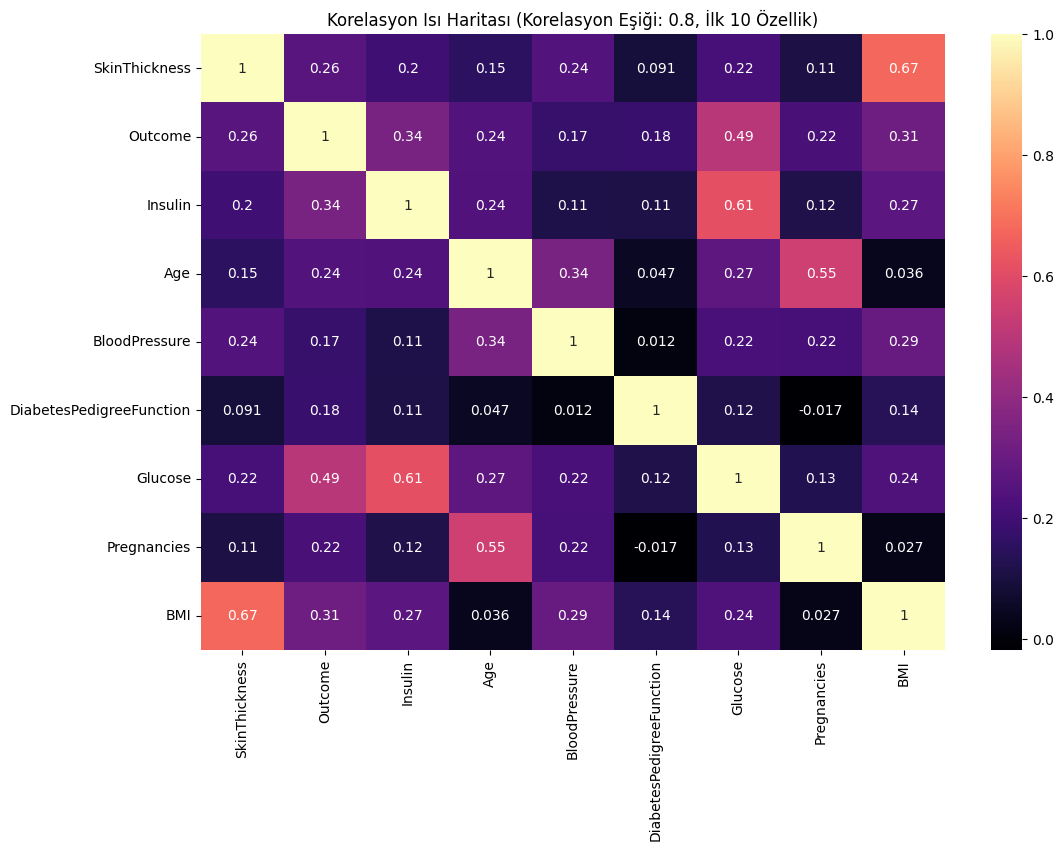

In [87]:
threshold = 0.8
correlation_matrix = df.corr()
high_corr_features = correlation_matrix[abs(correlation_matrix) > threshold]


top_n = 10
top_corr_feature_names = []
for col in high_corr_features.columns:
    top_corr_feature_names.extend(high_corr_features[high_corr_features[col] == True].index.tolist())
top_corr_feature_names = list(set(top_corr_feature_names))[:top_n]


top_corr_matrix = df[top_corr_feature_names].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, cmap='magma', annot=True)
plt.title(f"Korelasyon Isı Haritası (Korelasyon Eşiği: {threshold}, İlk {top_n} Özellik)")
plt.show()

###  2.FEATURE ENGINEERING  

In [88]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [89]:
na_cols = missing_values_table(df, True) 

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


#### Define a Function about comparing target variable with missing values

In [90]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [91]:
missing_vs_target(df, "Outcome", na_cols)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11




In [92]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

##### Fill the missing values of "Insulin" and "SkinThickness variables by implementing the KNN method

In [93]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

def fill_missing_with_knn(df, columns_to_fill):
  
    dff = pd.get_dummies(df[columns_to_fill], drop_first=True)

    # # # Standardization of variables
    scaler = MinMaxScaler()
    dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

    # # Implement the KNN method
    imputer = KNNImputer(n_neighbors=5)
    dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)

   
    dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

    
    for col in columns_to_fill:
        df[col] = dff[col]

    return df


In [94]:
columns_to_fill = ['Insulin', 'SkinThickness']
df = fill_missing_with_knn(df, columns_to_fill)

In [95]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72.000,35.000,196.925,33.600,0.627,50.000,1
1,1.000,85.000,66.000,29.000,157.800,26.600,0.351,31.000,0
2,8.000,183.000,64.000,29.059,146.500,23.300,0.672,32.000,1
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1
5,5.000,116.000,74.000,29.059,146.500,25.600,0.201,30.000,0
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10.000,115.000,72.000,29.059,146.500,35.300,0.134,29.000,0
8,2.000,197.000,70.000,45.000,360.625,30.500,0.158,53.000,1
9,8.000,125.000,96.000,29.059,146.500,32.300,0.232,54.000,1


####  * 2.2.Creating New Feature Interactions

In [97]:
df.loc[(df['Glucose'] < 70), 'GLUCOSE_CAT'] ="hipoglisemi"
df.loc[(df['Glucose'] >= 70) & (df['Glucose'] < 100) , 'GLUCOSE_CAT'] ="normal"
df.loc[(df['Glucose'] >= 100) & (df['Glucose'] < 126) , 'GLUCOSE_CAT'] ="imparied glucose"
df.loc[(df['Glucose'] >= 126), 'GLUCOSE_CAT'] ="hiperglisemi"

In [98]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT
0,6.000,148.000,72.000,35.000,196.925,33.600,0.627,50.000,1,hiperglisemi
1,1.000,85.000,66.000,29.000,157.800,26.600,0.351,31.000,0,normal
2,8.000,183.000,64.000,29.059,146.500,23.300,0.672,32.000,1,hiperglisemi
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,normal
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,hiperglisemi
5,5.000,116.000,74.000,29.059,146.500,25.600,0.201,30.000,0,imparied glucose
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1,normal
7,10.000,115.000,72.000,29.059,146.500,35.300,0.134,29.000,0,imparied glucose
8,2.000,197.000,70.000,45.000,360.625,30.500,0.158,53.000,1,hiperglisemi
9,8.000,125.000,96.000,29.059,146.500,32.300,0.232,54.000,1,imparied glucose


In [100]:
print(df.groupby("GLUCOSE_CAT").agg({"Outcome": ["mean","count"]}))
print(df.groupby("Outcome").agg({"Age":"mean"}))


                 Outcome      
                    mean count
GLUCOSE_CAT                   
hiperglisemi       0.593   297
hipoglisemi        0.000    11
imparied glucose   0.280   279
normal             0.077   181
           Age
Outcome       
0       31.135
1       37.052


In [101]:
df.loc[(df['Age'] >= 18) & (df['Age'] < 30) , 'AGE_CAT'] ="young_women_"
df.loc[(df['Age'] >= 30) & (df['Age'] < 45) , 'AGE_CAT'] ="mature_women"
df.loc[(df['Age'] >= 45) & (df['Age'] < 65) , 'AGE_CAT'] ="middle_age"
df.loc[(df['Age'] >= 65) & (df['Age'] < 75) , 'AGE_CAT'] ="old_age"
df.loc[(df['Age'] >= 75) , 'AGE_CAT'] ="elder_age"

In [102]:
df.groupby("AGE_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                mean count
AGE_CAT                   
mature_women   0.494   239
middle_age     0.530   117
old_age        0.250    16
young_women_   0.212   396

In [103]:
df.loc[(df['BMI'] < 16), 'BMI_CAT'] ="overweak"
df.loc[(df['BMI'] >= 16) & (df['BMI'] < 18.5) , 'BMI_CAT'] ="weak"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25) , 'BMI_CAT'] ="normal"
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30) , 'BMI_CAT'] ="overweight"
df.loc[(df['BMI'] >= 30) & (df['BMI'] < 35) , 'BMI_CAT'] ="1st_Obese"
df.loc[(df['BMI'] >= 35) & (df['BMI'] < 45) , 'BMI_CAT'] ="2nd_Obese"
df.loc[(df['BMI'] >= 45), 'BMI_CAT'] ="3rd_Obese"


In [104]:
df.groupby("BMI_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
              mean count
BMI_CAT                 
1st_Obese    0.438   235
2nd_Obese    0.453   212
3rd_Obese    0.611    36
normal       0.069   102
overweight   0.223   179
weak         0.000     4

In [105]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT,AGE_CAT,BMI_CAT
0,6.000,148.000,72.000,35.000,196.925,33.600,0.627,50.000,1,hiperglisemi,middle_age,1st_Obese
1,1.000,85.000,66.000,29.000,157.800,26.600,0.351,31.000,0,normal,mature_women,overweight
2,8.000,183.000,64.000,29.059,146.500,23.300,0.672,32.000,1,hiperglisemi,mature_women,normal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,normal,young_women_,overweight
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,hiperglisemi,mature_women,2nd_Obese
5,5.000,116.000,74.000,29.059,146.500,25.600,0.201,30.000,0,imparied glucose,mature_women,overweight
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1,normal,young_women_,1st_Obese
7,10.000,115.000,72.000,29.059,146.500,35.300,0.134,29.000,0,imparied glucose,young_women_,2nd_Obese
8,2.000,197.000,70.000,45.000,360.625,30.500,0.158,53.000,1,hiperglisemi,middle_age,1st_Obese
9,8.000,125.000,96.000,29.059,146.500,32.300,0.232,54.000,1,imparied glucose,middle_age,1st_Obese


In [106]:
df.loc[(df['BloodPressure'] < 70)  , 'DIASTOLIC_CAT'] ="low"
df.loc[(df['BloodPressure'] >= 70) & (df['BMI'] < 90) , 'DIASTOLIC_CAT'] ="normal"
df.loc[(df['BloodPressure'] >= 90 ) , 'DIASTOLIC_CAT'] ="high"

df.groupby("DIASTOLIC_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                 mean count
DIASTOLIC_CAT              
high            0.483    60
low             0.247   283
normal          0.398   425

In [109]:
df.loc[(df['Insulin'] < 120)  , 'INSULIN_CAT'] ="normal"
df.loc[(df['Insulin'] >= 120) , 'INSULIN_CAT'] ="abnormal"

df.groupby("INSULIN_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
               mean count
INSULIN_CAT              
abnormal      0.435   545
normal        0.139   223

In [110]:
df["Pregnancies"].value_counts()

Pregnancies
1.000     135
0.000     111
2.000     103
3.000      75
4.000      68
5.000      57
6.000      50
7.000      45
8.000      38
9.000      28
10.000     24
11.000     11
13.000     10
12.000      9
13.500      4
Name: count, dtype: int64

In [112]:
df.loc[(df['Pregnancies'] == 0)  , 'PREG_CAT'] ="unpregnant"
df.loc[(df['Pregnancies'] > 0 ) & (df['Pregnancies'] <= 5)  , 'PREG_CAT'] ="normal"
df.loc[(df['Pregnancies'] > 5 ) & (df['Pregnancies'] <= 10 )  , 'PREG_CAT'] ="high"
df.loc[(df['Pregnancies'] > 10 )  , 'PREG_CAT'] ="very high"

df.groupby("PREG_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
              mean count
PREG_CAT                
high         0.492   185
normal       0.272   438
unpregnant   0.342   111
very high    0.588    34

In [113]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT,AGE_CAT,BMI_CAT,DIASTOLIC_CAT,INSULIN_CAT,PREG_CAT
0,6.000,148.000,72.000,35.000,196.925,33.600,0.627,50.000,1,hiperglisemi,middle_age,1st_Obese,normal,abnormal,high
1,1.000,85.000,66.000,29.000,157.800,26.600,0.351,31.000,0,normal,mature_women,overweight,low,abnormal,normal
2,8.000,183.000,64.000,29.059,146.500,23.300,0.672,32.000,1,hiperglisemi,mature_women,normal,low,abnormal,high
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,normal,young_women_,overweight,low,normal,normal
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,hiperglisemi,mature_women,2nd_Obese,low,abnormal,unpregnant
5,5.000,116.000,74.000,29.059,146.500,25.600,0.201,30.000,0,imparied glucose,mature_women,overweight,normal,abnormal,normal
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1,normal,young_women_,1st_Obese,low,normal,normal
7,10.000,115.000,72.000,29.059,146.500,35.300,0.134,29.000,0,imparied glucose,young_women_,2nd_Obese,normal,abnormal,high
8,2.000,197.000,70.000,45.000,360.625,30.500,0.158,53.000,1,hiperglisemi,middle_age,1st_Obese,normal,abnormal,normal
9,8.000,125.000,96.000,29.059,146.500,32.300,0.232,54.000,1,imparied glucose,middle_age,1st_Obese,high,abnormal,high


#### * 2.3.Processing Encoding and One-Hot Encoding

In [114]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe 

In [115]:
for col in binary_cols:
    df = label_encoder(df, col)

In [116]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [117]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [122]:
binary_cols

['INSULIN_CAT']

In [118]:
ohe_cols

['GLUCOSE_CAT', 'AGE_CAT', 'BMI_CAT', 'DIASTOLIC_CAT', 'PREG_CAT']

In [123]:
df = one_hot_encoder(df, ohe_cols)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,INSULIN_CAT,GLUCOSE_CAT_hipoglisemi,GLUCOSE_CAT_imparied glucose,GLUCOSE_CAT_normal,AGE_CAT_middle_age,AGE_CAT_old_age,AGE_CAT_young_women_,BMI_CAT_2nd_Obese,BMI_CAT_3rd_Obese,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_weak,DIASTOLIC_CAT_low,DIASTOLIC_CAT_normal,PREG_CAT_normal,PREG_CAT_unpregnant,PREG_CAT_very high
0,6.000,148.000,72.000,35.000,196.925,33.600,0.627,50.000,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,1.000,85.000,66.000,29.000,157.800,26.600,0.351,31.000,0,0,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False
2,8.000,183.000,64.000,29.059,146.500,23.300,0.672,32.000,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,1,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
5,5.000,116.000,74.000,29.059,146.500,25.600,0.201,30.000,0,0,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1,1,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False
7,10.000,115.000,72.000,29.059,146.500,35.300,0.134,29.000,0,0,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False
8,2.000,197.000,70.000,45.000,360.625,30.500,0.158,53.000,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
9,8.000,125.000,96.000,29.059,146.500,32.300,0.232,54.000,1,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


####  * 2.4.Standardization for numerical variables

In [125]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()


df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,INSULIN_CAT,GLUCOSE_CAT_hipoglisemi,GLUCOSE_CAT_imparied glucose,GLUCOSE_CAT_normal,AGE_CAT_middle_age,AGE_CAT_old_age,AGE_CAT_young_women_,BMI_CAT_2nd_Obese,BMI_CAT_3rd_Obese,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_weak,DIASTOLIC_CAT_low,DIASTOLIC_CAT_normal,PREG_CAT_normal,PREG_CAT_unpregnant,PREG_CAT_very high
0,0.647,0.866,-0.031,0.704,0.730,0.181,0.589,1.446,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,-0.849,-1.205,-0.544,-0.007,0.150,-0.869,-0.378,-0.189,0,0,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False
2,1.246,2.017,-0.715,0.000,-0.018,-1.365,0.747,-0.103,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,-0.849,-1.074,-0.544,-0.718,-0.796,-0.644,-1.023,-1.050,0,1,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False
4,-1.148,0.504,-2.768,0.704,0.301,1.607,2.597,-0.017,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
5,0.348,-0.186,0.140,0.000,-0.018,-1.020,-0.904,-0.275,0,0,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False
6,-0.251,-1.435,-1.913,0.349,-0.885,-0.209,-0.739,-0.620,1,1,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False
7,1.844,-0.219,-0.031,0.000,-0.018,0.436,-1.138,-0.361,0,0,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False
8,-0.550,2.477,-0.202,1.890,3.158,-0.284,-1.054,1.704,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
9,1.246,0.110,2.022,0.000,-0.018,-0.014,-0.795,1.790,1,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


###

####  * 2.5.Create And Search Best Model

In [126]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
]


LogisticRegression()
	Accuracy Score: 0.7597402597402597
	Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

	F1 Score: 0.7610813964796266
	Recall Score: 0.7597402597402597
	Precision Score: 0.7630080049261084


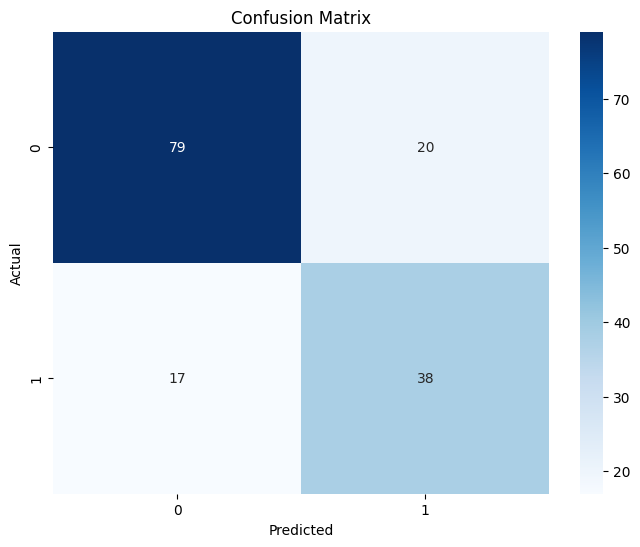


DecisionTreeClassifier()
	Accuracy Score: 0.6688311688311688
	Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.53      0.56      0.55        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.67      0.67       154

	F1 Score: 0.6706797627151609
	Recall Score: 0.6688311688311688
	Precision Score: 0.6730295566502463


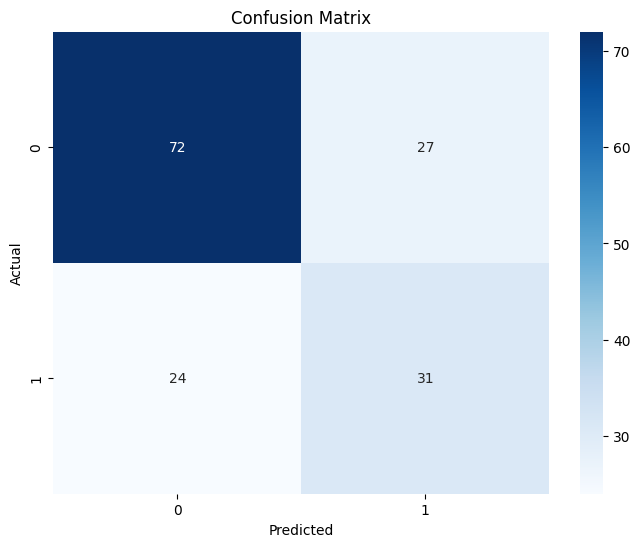


RandomForestClassifier()
	Accuracy Score: 0.7857142857142857
	Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154

	F1 Score: 0.7881978405538616
	Recall Score: 0.7857142857142857
	Precision Score: 0.7939541174113405


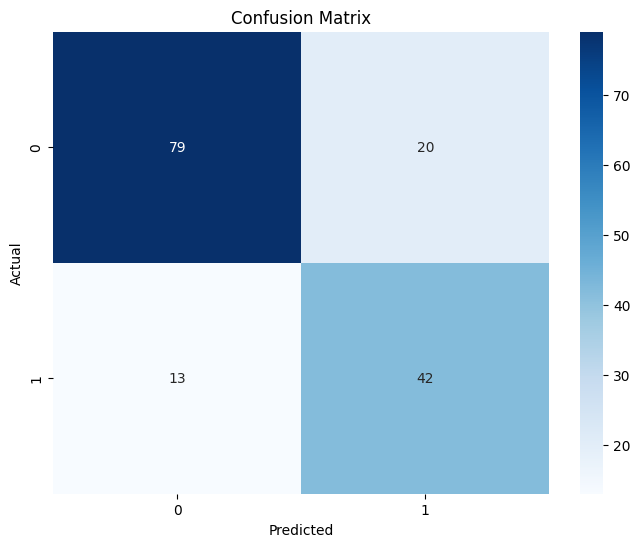


SVC()
	Accuracy Score: 0.7532467532467533
	Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

	F1 Score: 0.7532467532467533
	Recall Score: 0.7532467532467533
	Precision Score: 0.7532467532467533


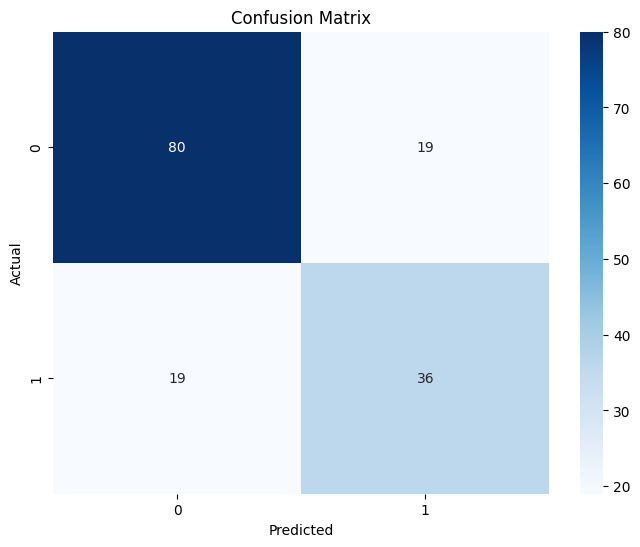


GradientBoostingClassifier()
	Accuracy Score: 0.7402597402597403
	Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

	F1 Score: 0.7429187192118227
	Recall Score: 0.7402597402597403
	Precision Score: 0.7478280577170053


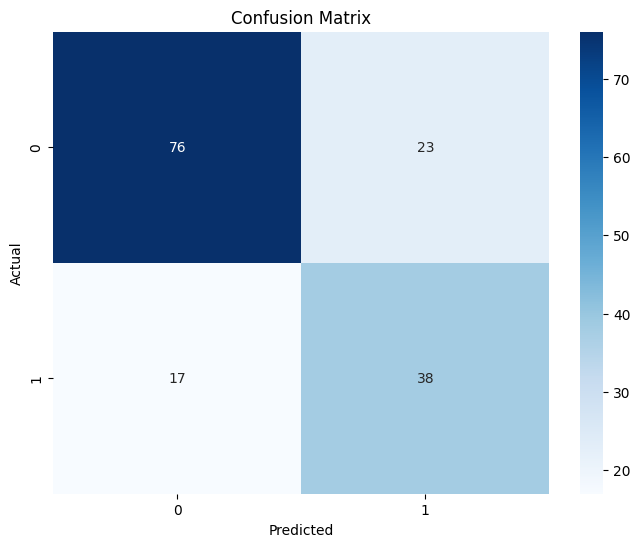


AdaBoostClassifier()
	Accuracy Score: 0.7467532467532467
	Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

	F1 Score: 0.7481668773704172
	Recall Score: 0.7467532467532467
	Precision Score: 0.7501539408866995


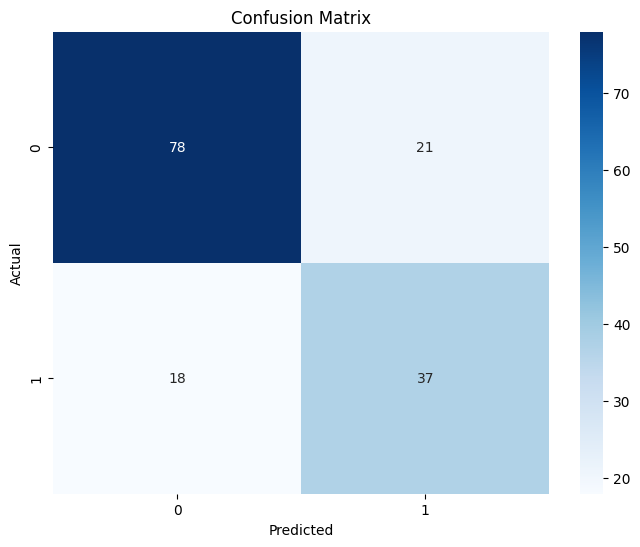


KNeighborsClassifier()
	Accuracy Score: 0.7337662337662337
	Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

	F1 Score: 0.7374949979991997
	Recall Score: 0.7337662337662337
	Precision Score: 0.7462053571428571


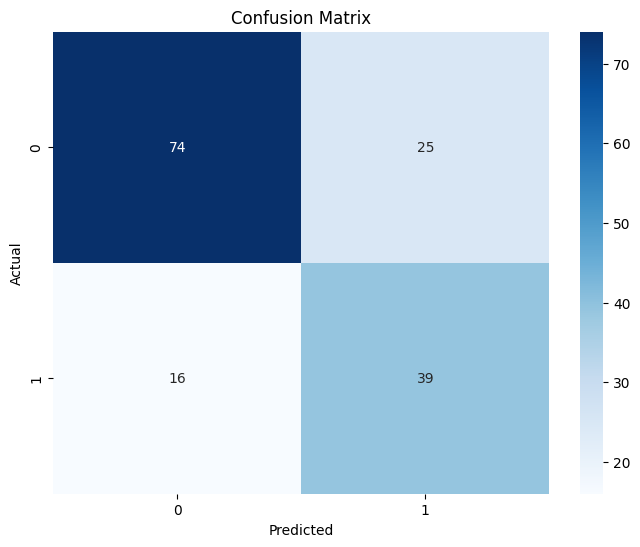

In [139]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from time import time

head = 7
for model in classifiers[:head]:  
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start
    print(model)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print("\tAccuracy Score:", accuracy)
    print("\tClassification Report:")
    print(classification_rep)
    
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
    
    print("\tF1 Score:", f1)
    print("\tRecall Score:", recall)
    print("\tPrecision Score:", precision)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print()


#### Model GridSearch Processing

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features":['sqrt']
}

rf = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)





GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [144]:
best_params = grid_search.best_params_
print("best_params:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


best_params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [145]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test verisi doğruluk:", accuracy)
print("Sınıflandırma Raporu:")
print(classification_rep)


Test verisi doğruluk: 0.7532467532467533
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

